### Initialising Kaggle Environment

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images


### Extracting the Zipfile

In [ ]:
# from zipfile import ZipFile
# target_folder='/content/drive/MyDrive/datasets/pneumonia-xray'
# zip=ZipFile('/content/pneumonia-xray-images.zip')
# zip.extractall(target_folder)

### Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import cv2 as cv
import os

### Image Paths

In [ ]:
train_path='/content/drive/MyDrive/datasets/pneumonia-xray/train'
test_path= '/content/drive/MyDrive/datasets/pneumonia-xray/test'
val_path=  '/content/drive/MyDrive/datasets/pneumonia-xray/val'

In [ ]:
train_files=os.listdir(train_path)
train_files[:10]

['normal', 'opacity']

### Number of Images

In [ ]:
# Images in train folder
train_normal=len(os.listdir(os.path.join(train_path,train_files[0])))

print("Number of images in normal folder of training ",train_normal)
train_opacity=len(os.listdir(os.path.join(train_path,train_files[1])))
print("Number of images in opacity folder of training ",train_opacity)
print("Total number of training image ",train_normal+train_opacity)



Number of images in normal folder of training  1082
Number of images in opacity folder of training  3110
Total number of training image  4192


In [ ]:
val_files=os.listdir(val_path)
val_files[:10]

['normal', 'opacity']

In [ ]:
val_normal=len(os.listdir(os.path.join(val_path,val_files[0])))

print("Number of images in normal folder of val ",val_normal)
val_opacity=len(os.listdir(os.path.join(val_path,val_files[1])))
print("Number of images in opacity folder of val ",val_opacity)
print("Total number of val image ",val_normal+val_opacity)

Number of images in normal folder of val  267
Number of images in opacity folder of val  773
Total number of val image  1040


In [ ]:
total_img=train_normal+train_opacity+val_normal+val_opacity
print("Total Number of Images for Training ",total_img)

Total Number of Images for Training  5232


In [ ]:
test_files=os.listdir(test_path)
print("Total Number of Images for Testing ",len(os.listdir(os.path.join(test_path,'normal')))+len(os.listdir(os.path.join(test_path,'opacity'))))


Total Number of Images for Testing  624


Total number of training image  4192

Total number of val image  1040

Total Number of Images for Testing  624

### Coppying Images of Training and validation in training folder

In [ ]:
# import shutil
# # src='/content/drive/MyDrive/datasets/pneumonia-xray/train'
# # dst='/content/drive/MyDrive/datasets/pneumonia-xray/training'
# def copy_img(src,dst):
#   for file in os.listdir(src):
#     src_path=os.path.join(src,file)
#     dst_path=os.path.join(dst,file)
#     shutil.copy(src_path,dst_path)

In [ ]:
# src='/content/drive/MyDrive/datasets/pneumonia-xray/train/normal'
# dst='/content/drive/MyDrive/datasets/pneumonia-xray/training/normal'
# copy_img(src,dst)

In [ ]:
# src='/content/drive/MyDrive/datasets/pneumonia-xray/train/opacity'
# dst='/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity'
# copy_img(src,dst)

In [ ]:
# src='/content/drive/MyDrive/datasets/pneumonia-xray/val/normal'
# dst='/content/drive/MyDrive/datasets/pneumonia-xray/training/normal'
# copy_img(src,dst)

In [ ]:
# src='/content/drive/MyDrive/datasets/pneumonia-xray/val/opacity'
# dst='/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity'
# copy_img(src,dst)

In [ ]:
len(os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity'))+len(os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/normal'))

5232

### Image Plotting

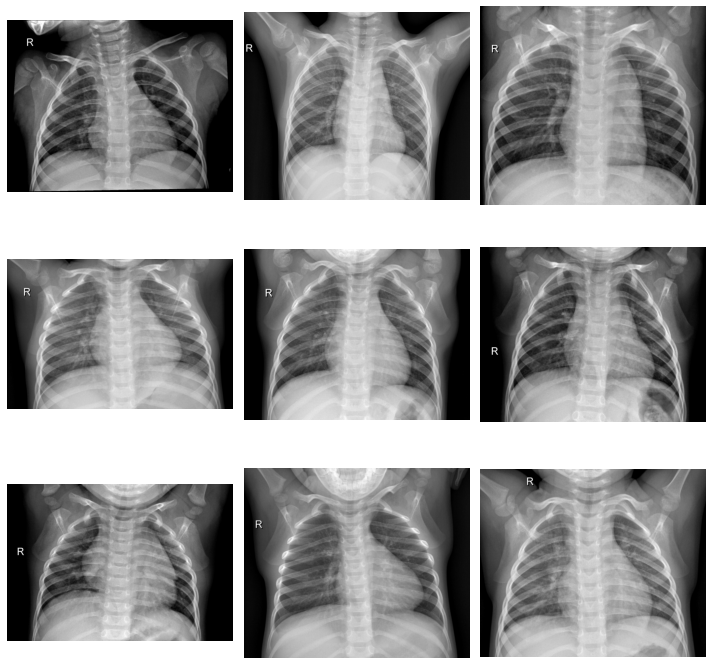

In [ ]:
plt.figure(1,figsize=(10,10))
x=0
for i in os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/train/normal')[:9]:

    plt.subplot(3,3, x+1)
    x=x+1
    path='/content/drive/MyDrive/datasets/pneumonia-xray/train/normal'+'/'+i
    image = cv.imread(path)
    plt.imshow(image)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

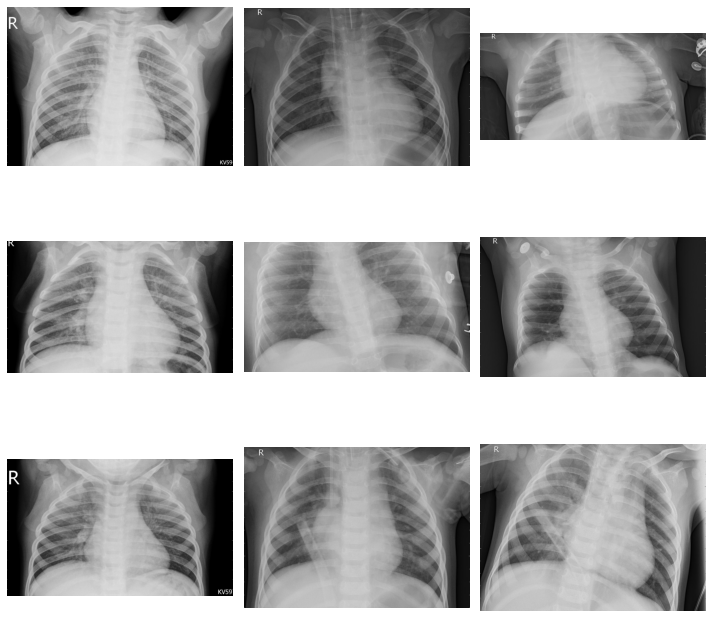

In [ ]:
plt.figure(1,figsize=(10,10))
x=0
for i in os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/train/opacity')[50:59]:

    plt.subplot(3,3, x+1)
    x=x+1
    path='/content/drive/MyDrive/datasets/pneumonia-xray/train/opacity'+'/'+i
    image = cv.imread(path)
    plt.imshow(image)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [ ]:
training_path='/content/drive/MyDrive/datasets/pneumonia-xray/training'

In [ ]:
labels=os.listdir(training_path)
labels

['normal', 'opacity']

In [ ]:
df1=pd.DataFrame({'Images':os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/normal')})
df1=df1.apply(lambda p: '/content/drive/MyDrive/datasets/pneumonia-xray/training/normal/'+p )

df1['labels']=['normal' for i in range(len(os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/normal')))]

df2=pd.DataFrame({'Images':os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity')})
df2=df2.apply(lambda p: '/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity/'+p )
df2['labels']=['opacity' for i in range(len(os.listdir('/content/drive/MyDrive/datasets/pneumonia-xray/training/opacity')))]
df=pd.concat([df1,df2],ignore_index=True)
df.shape


(5232, 2)

In [ ]:
df

,Images,labels
0,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
1,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
2,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
3,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
4,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
...,...,...
5227,/content/drive/MyDrive/datasets/pneumonia-xray...,opacity
5228,/content/drive/MyDrive/datasets/pneumonia-xray...,opacity
5229,/content/drive/MyDrive/datasets/pneumonia-xray...,opacity
5230,/content/drive/MyDrive/datasets/pneumonia-xray...,opacity


In [ ]:
df.labels.value_counts()

opacity    3883
normal     1349
Name: labels, dtype: int64

### Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen=ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,          
                               )

test_img_gen=ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size=64
IMG_HEIGHT,IMG_WIDTH=400,400

In [ ]:
# train_img=img_gen.flow_from_directory(
#       training_path,
#       target_size=(IMG_HEIGHT,IMG_WIDTH),
#       color_mode='grayscale',
#       class_mode='binary',
#       batch_size=batch_size
#       )

# valid_img=test_img_gen.flow_from_directory(
#       val_path,
#       target_size=(IMG_HEIGHT,IMG_WIDTH),
#       color_mode='grayscale',
#       class_mode='binary', 
#       batch_size=batch_size
#       )

# test_img=test_img_gen.flow_from_directory(
#       test_path,
#       target_size=(IMG_HEIGHT,IMG_WIDTH),
#       color_mode='grayscale',
#       shuffle=False,
#       class_mode='binary',
#       batch_size=batch_size
#       )

In [ ]:
# plt.figure(figsize=(15, 15))
# for i in range(0, 10):
#     plt.subplot(2, 5, i+1)
#     for X_train,Y_train in train_img:
#         image=X_train[0]  
#         image=np.squeeze(image)   
#         label={0:'NORMAL', 1:'PNEUMONIA'}
#         plt.title(label.get(Y_train[0]))
#         plt.axis('off')
#         plt.imshow(image,cmap='gray')
#         break
# plt.tight_layout()
# plt.show()

### Importing tensorflow libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# from keras_tuner.tuners import RandomSearch

### Model building

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(activation='relu',units=128))
model.add(Dense(activation='relu',units=64))
model.add(Dense(activation ='sigmoid',units=1))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Summary Of Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0

In [ ]:
df.iloc[[1,4,456]]

,Images,labels
1,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
4,/content/drive/MyDrive/datasets/pneumonia-xray...,normal
456,/content/drive/MyDrive/datasets/pneumonia-xray...,normal


In [ ]:
 from sklearn.model_selection import KFold,StratifiedKFold

In [ ]:
early=EarlyStopping(monitor='val_loss', mode='min', patience=3)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=2,factor=0.3, min_lr=0.000001)
call_backs=[early,lr_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
# train_img=img_gen.flow_from_dataframe(train_data,
                                      
#                                       x_col='Images',
#                                       y_col='labels',
#                                       class_mode='binary',
#                                       batch_size=batch_size,
#                                       shuffle=True,
#                                       target_size=(200,200)
                                      
#                                      )
# val_img=img_gen.flow_from_dataframe(val_data,x_col='Images',
#                                     y_col="labels",
#                                     class_mode="binary",
#                                     batch_size=batch_size,
#                                     shuffle=True,
#                                     target_size=(200,200)
                                      
#                                      )
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# modelFit=model.fit(train_img,
#           steps_per_epoch=len(train_img),
#           validation_data=val_img,
#           epochs=5,
#           validation_steps=len(val_img))

In [ ]:
from sklearn.utils import class_weight
skf=StratifiedKFold(n_splits=5,shuffle=True)
X=np.array(df.Images)
y=np.array(df.labels)
accuracy=[]
trainIndex=[]
testIndex=[]
for train_index,test_index in skf.split(X,y):
  print(train_index)
  trainData=df.iloc[train_index]
  # print(np.array(trainData.labels))

  print(test_index)
  testData=df.iloc[test_index]
  # print(np.array(testData.labels))

  trainIndex=train_index
  testIndex=test_index
  
  
  train_img=img_gen.flow_from_dataframe(trainData,
                                        x_col='Images',
                                        y_col='labels',
                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                        class_mode='binary', 
                                        batch_size=64,
                                        color_mode='grayscale'
                                        )
  val_img=img_gen.flow_from_dataframe(testData,
                                        x_col='Images',
                                        y_col='labels',
                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                        class_mode='binary', 
                                        batch_size=64,
                                        color_mode='grayscale'
                                        )
  weights=compute_class_weight(class_weight="balanced",classes=np.array([0,1]),y=train_img.classes)
  dict={0:weights[0],1:weights[1]}
  print(dict)
  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  model.fit(train_img,validation_data=val_img,epochs=5,callbacks=call_backs,class_weight=dict)
        
  
  metrics=model.history.history
  
  accuracy.append(metrics['val_accuracy'])
  print(accuracy)



[   0    1    2 ... 5229 5230 5231]
[   7   10   11 ... 5204 5205 5225]
Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
{0: 1.9392956441149212, 1: 0.6736960721184804}
Epoch 1/5
66/66 [==============================] - 535s 8s/step - loss: 0.3766 - accuracy: 0.8232 - val_loss: 0.3015 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 2/5
66/66 [==============================] - 103s 2s/step - loss: 0.2658 - accuracy: 0.8872 - val_loss: 0.4354 - val_accuracy: 0.8109 - lr: 0.0010
Epoch 3/5
66/66 [==============================] - 103s 2s/step - loss: 0.2719 - accuracy: 0.8853 - val_loss: 0.2908 - val_accuracy: 0.8816 - lr: 0.0010
Epoch 4/5
66/66 [==============================] - 103s 2s/step - loss: 0.2295 - accuracy: 0.9059 - val_loss: 0.2282 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 5/5
66/66 [==============================] - 103s 2s/step - loss: 0.2156 - accuracy: 0.9106 - val_loss: 0.2200 - val_accuracy: 0.9150 - lr: 0

In [ ]:
trainData=df.iloc[trainIndex]


testData=df.iloc[testIndex]
train_img=img_gen.flow_from_dataframe(trainData,
                                        x_col='Images',
                                        y_col='labels',
                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                        class_mode='binary', 
                                        batch_size=64,
                                        color_mode='grayscale'
                                        )
val_img=img_gen.flow_from_dataframe(testData,
                                      x_col='Images',
                                      y_col='labels',
                                      target_size=(IMG_HEIGHT,IMG_WIDTH),
                                      class_mode='binary', 
                                      batch_size=64,
                                      color_mode='grayscale'
                                      )
weights=compute_class_weight(class_weight="balanced",classes=np.array([0,1]),y=train_img.classes)
dict={0:weights[0],1:weights[1]}
print(dict)
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model.fit(train_img,validation_data=val_img,epochs=5,callbacks=call_backs,class_weight=dict)

Found 4186 validated image filenames belonging to 2 classes.
Found 1046 validated image filenames belonging to 2 classes.
{0: 1.9379629629629629, 1: 0.6738570508692853}
Epoch 1/5
66/66 [==============================] - 108s 2s/step - loss: 0.1297 - accuracy: 0.9498 - val_loss: 0.1236 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 2/5
66/66 [==============================] - 105s 2s/step - loss: 0.1065 - accuracy: 0.9596 - val_loss: 0.0835 - val_accuracy: 0.9713 - lr: 0.0010
Epoch 3/5
66/66 [==============================] - 103s 2s/step - loss: 0.1124 - accuracy: 0.9565 - val_loss: 0.1210 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 4/5
66/66 [==============================] - 103s 2s/step - loss: 0.1078 - accuracy: 0.9620 - val_loss: 0.0970 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 5/5
66/66 [==============================] - 104s 2s/step - loss: 0.0882 - accuracy: 0.9677 - val_loss: 0.1198 - val_accuracy: 0.9532 - lr: 3.0000e-04


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
val_accuracy=[0.9274,0.9427,0.9551,0.9675,0.9484]
validation_accuracy=np.array(val_accuracy)
validation_accuracy

array([0.9274, 0.9427, 0.9551, 0.9675, 0.9484])

In [ ]:
np.mean(validation_accuracy)

0.9482200000000001

In [ ]:
np.max(validation_accuracy)

0.9675

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir='TB',
#            expand_nested=True)

In [ ]:
# train_img.classes

In [ ]:
# model.fit(train_img,
#         epochs=20,
#         validation_data=valid_img,
#         callbacks=call_backs,
#         class_weight=dict
#         )

In [ ]:
metrics=model.history.history
metrics['loss']

In [ ]:
import pandas as pd

In [ ]:
metrics_df=pd.DataFrame(metrics)
metrics_df

In [ ]:
metrics_df.plot()

In [ ]:
test_metrics=model.evaluate(test_img)
test_metrics

In [ ]:
test_acc=test_metrics[1]*100
test_acc

In [ ]:
prediction=model.predict(test_img)
prediction[prediction<0.5]=0
prediction[prediction>=0.5]=1


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
matrix=confusion_matrix(test_img.classes,prediction, labels=[0, 1])
df=pd.DataFrame(matrix,index=['Actual Normal','Actual Pneumonia'],columns=['Predicted Normal','Predicted Pneumonia'])
df

In [ ]:
print(classification_report(test_img.classes,prediction,target_names =['NORMAL','PNEUMONIA']))

## **Transfer Learning**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')